# INTRODUCTION
<br>
We have a data which classified if patients have heart disease or not according to features in it. We will try to use this data to create a model which tries predict if a patient has this disease or not. We will use logistic regression (classification) algorithm.

Data contains; <br>

* age - age in years <br>
* sex - (1 = male; 0 = female) <br>
* cp - chest pain type <br>
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) <br>
* chol - serum cholestoral in mg/dl <br>
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) <br>
* restecg - resting electrocardiographic results <br>
* thalach - maximum heart rate achieved <br>
* exang - exercise induced angina (1 = yes; 0 = no) <br>
* oldpeak - ST depression induced by exercise relative to rest <br>
* slope - the slope of the peak exercise ST segment <br>
* ca - number of major vessels (0-3) colored by flourosopy <br>
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect <br>
* target - have disease or not (1=yes, 0=no)

In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


## Read Data

In [2]:
# We are reading our data
df = pd.read_csv("heart.csv")

In [3]:
# First 5 rows of our data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Exploration

In [4]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

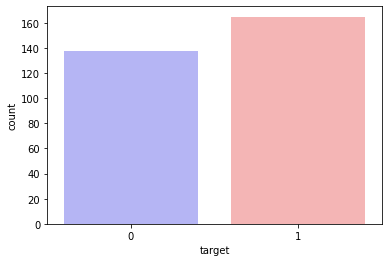

In [5]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [6]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


## Count of Males and Females

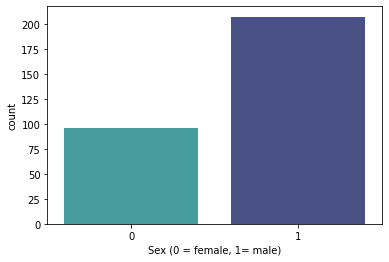

In [7]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

# Percent of Males and Females

In [8]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


## Heart Disease Frequency for Ages

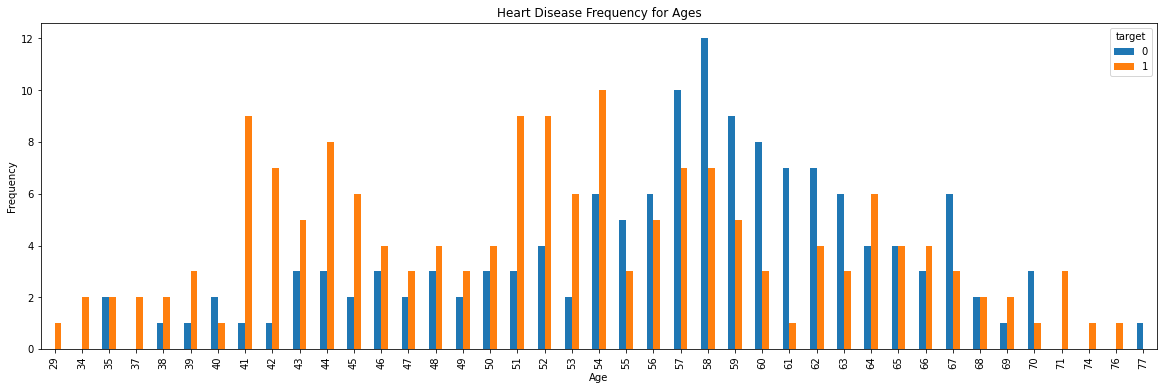

In [9]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

## Heart Disease Frequency for Sex

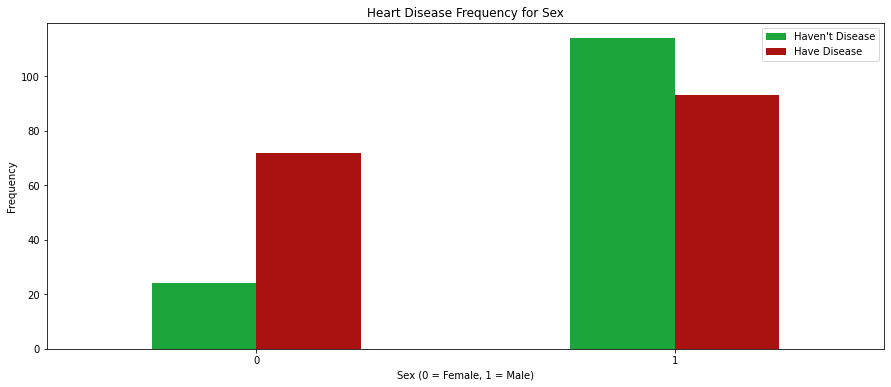

In [10]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

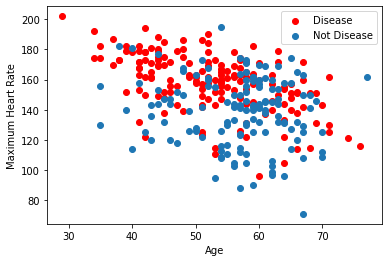

In [11]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

## Heart Disease Frequency for Slope

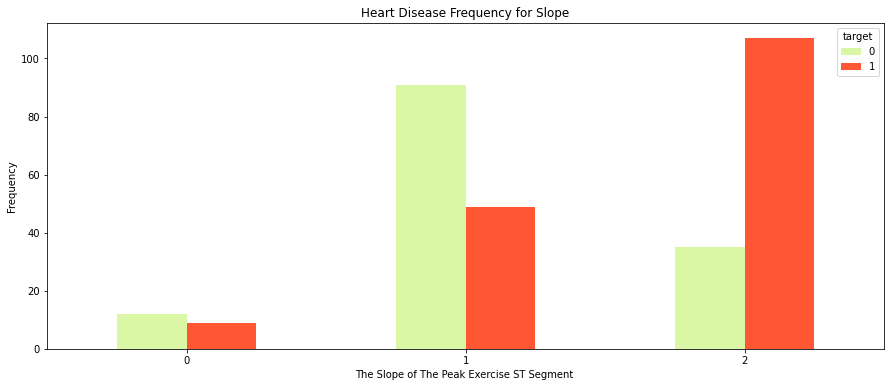

In [12]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

## Heart Disease Frequency According To FBS

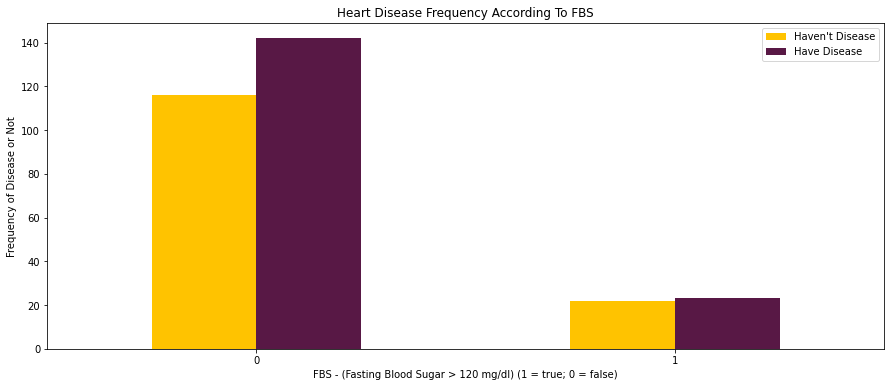

In [13]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

## Heart Disease Frequency According To Chest Pain Type

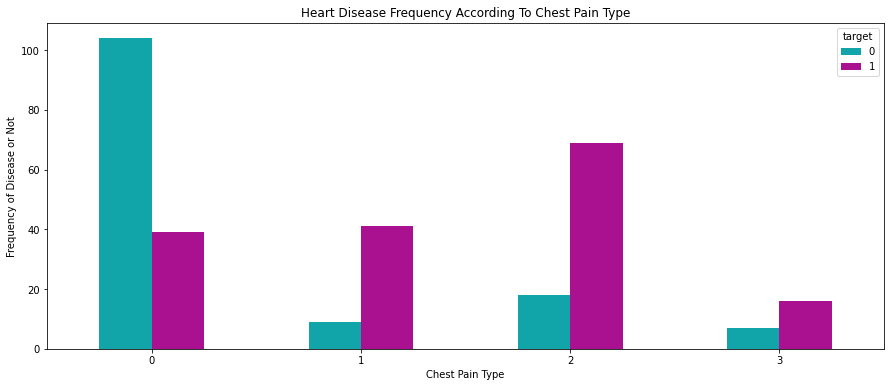

In [14]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

### Creating Dummy Variables

![](http://)Since 'cp', 'thal' and 'slope' are categorical variables we'll turn them into dummy variables.

In [33]:
df = pd.get_dummies(df)

## Creating Model for Logistic Regression
<br>
We can use sklearn library or we can write functions ourselves. Let's them both. Firstly we will write our functions after that we'll use sklearn library to calculate score.

In [34]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [35]:
# Normalize
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x = sc.fit_transform(x_data)

We will split our data. 80% of our data will be train data and 20% of it will be test data.

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

### Sklearn Logistic Regression

In [37]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
acc = lr.score(x_test,y_test)*100
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 85.25%


## Confusion Matrix

In [39]:
# Predicted values
y_head_lr = lr.predict(x_test)

In [40]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_head_lr)

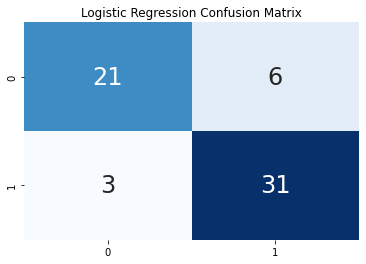

In [41]:
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24});

In [42]:
# classification report for precision, recall f1-score and accuracy
from sklearn.metrics import classification_report
matrix = classification_report(y_test,y_head_lr)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



In [43]:
#Plotting ROC and AUC
from sklearn.metrics import roc_curve, roc_auc_score
y_score = lr.predict_proba(x_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score))

roc_auc_score for Logistic Regression:  0.9150326797385622


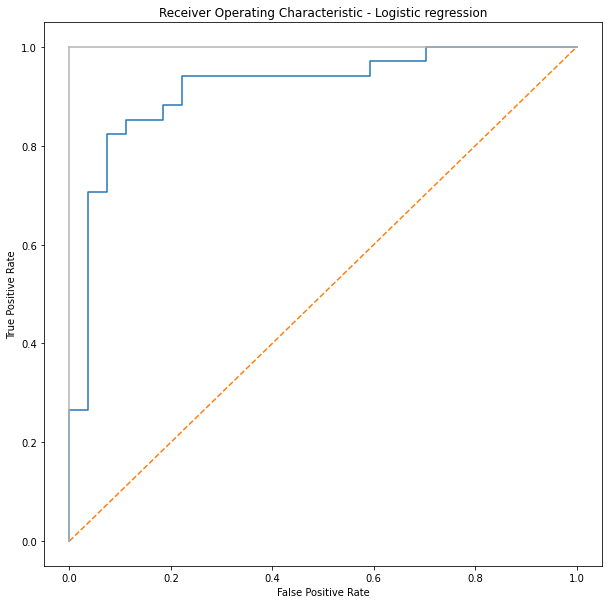

In [44]:
import matplotlib.pyplot as plt
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
